# Resumo

Nesse notebook, uma Rede Neural Convolucional é criada e treinada para classificar com Tensorflow, utilizando o dataset CFAR-10.<br>
As amostras desse dataset são imagens de 10 classes diferentes, com dimensões 32x32x3, e as labels tem dimensão Kx1.

# Importação dos recursos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Flatten, GlobalMaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


# Pré-processamento dos dados

In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # normaliza os atributos previsores e converte pra float com o .0
y_train, y_test = y_train.flatten(), y_test.flatten() # planifica os atributos de classe, que vêm com uma dimensão supérflua igual a 1
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

# Construção do modelo

In [5]:
K = len(set(y_test)) # extrai o número de classes
K

10

In [6]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i) # adiciona uma camada de convolução com stride de 2, com filtros que terã dimensão de 3x3x3x32
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x) # filtros agora tem 3x3x64, já que a dimensão de cor é removida pela convolução anterior
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)

x = Flatten()(x)

x = Dropout(0.2)(x) # adiciona um dropout de 20% a camada anterior
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

classifier = Model(i, x) # constrói o modelo com 1 input e 1 output

In [7]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), 
                  epochs = 15)

Epoch 1/15


I0000 00:00:1726349683.408513     101 service.cc:145] XLA service 0x7ebb3000d880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726349683.408579     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  67/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1497 - loss: 2.2424

I0000 00:00:1726349688.024320     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3661 - loss: 1.7313 - val_accuracy: 0.5462 - val_loss: 1.2679
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5507 - loss: 1.2473 - val_accuracy: 0.6002 - val_loss: 1.1113
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6171 - loss: 1.0780 - val_accuracy: 0.6280 - val_loss: 1.0486
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6699 - loss: 0.9298 - val_accuracy: 0.6602 - val_loss: 0.9652
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7062 - loss: 0.8276 - val_accuracy: 0.6700 - val_loss: 0.9459
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7490 - loss: 0.7118 - val_accuracy: 0.6816 - val_loss: 0.9166
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7782 - loss: 0.6203 - val_accuracy: 0.6798 - val_loss: 0.9428
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8045 - loss: 0.5461 - val_accura

# Visualização dos dados

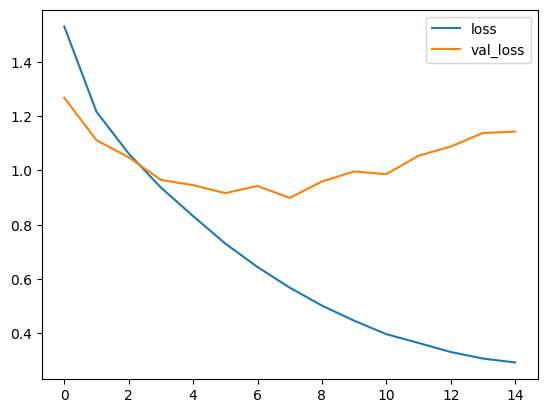

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

Vemos um padrão de erro nos dados de treino caindo muito de forma constante, mas nos dados de teste tivemos uma diminuição no início seguida de um aumento.<br>
Esse comportamento indica overfitting.

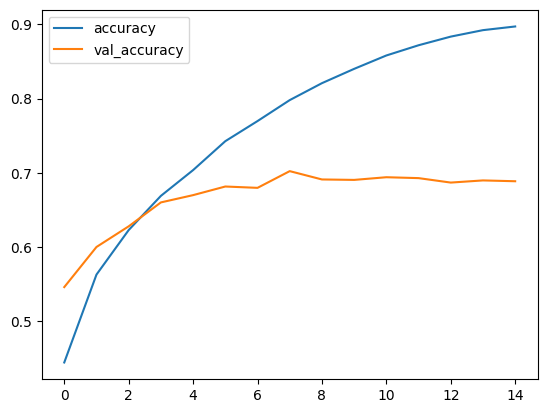

In [9]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Vemos a precisão de validação estagnando simultaneamente com o aumento do erro de validação e da precisão nos dados de treino.<br>
Isso indica a rede neural se adaptando aos ruídos dos dados de treino ao invés de fazer generalizações.

In [10]:
classifier.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.7893113e-05, 2.5524246e-04, 2.2020888e-04, ..., 2.2558401e-05,
        1.0504089e-03, 1.2389892e-04],
       [1.8382667e-05, 2.6644915e-01, 2.7041991e-12, ..., 8.0516722e-12,
        7.3324865e-01, 2.8365565e-04],
       [5.7375841e-03, 1.5446570e-03, 1.7491135e-05, ..., 2.1368103e-06,
        9.9076265e-01, 1.5267514e-03],
       ...,
       [1.6688683e-06, 9.8086594e-10, 2.7970124e-02, ..., 1.7182973e-04,
        4.0188357e-07, 2.1319414e-08],
       [1.3935469e-03, 1.4234346e-01, 5.9257722e-03, ..., 1.6811861e-03,
        1.3791089e-05, 7.5847529e-05],
       [2.2251566e-13, 2.4576600e-17, 2.4212432e-09, ..., 9.7611862e-01,
        2.5087850e-15, 2.0607017e-14]], dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Matriz não normalizada


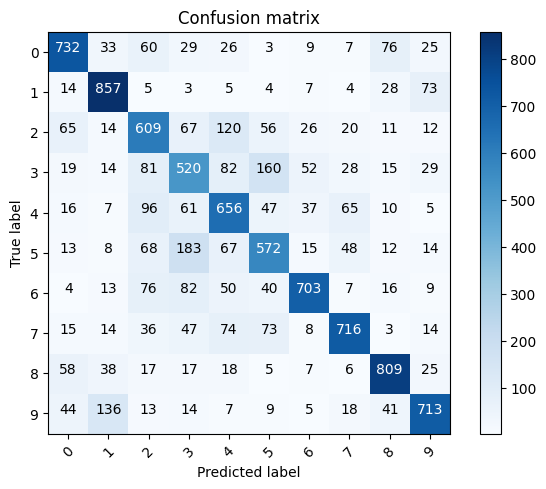

In [13]:
# plotagem da matriz de confusão
from sklearn.metrics import confusion_matrix
from itertools import product
"""
Função que plota um mapa de calor da matriz de confusão cm.
Eixo y é o das classes verdadeiras de cada amostra.
Eixo x é o das classes previstas pelo modelo.
"""
def plot_confusion_matrix(cm, classes, normalize = False, 
                          title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        """
        Normaliza cada linha (classe verdadeira) em relação a soma de seus valores
        """
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis] # usa broadcasting
        print("Matriz normalizada")
    else:
        print("Matriz não normalizada")
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap) # cria o plot de colormap de cm com interpolação "nearest"
    plt.title(title) # adiciona o título ao plot
    plt.colorbar() # adiciona uma barra de cor para explicar a escala do colormap
    tick_marks = np.arange(len(classes)) # cria K tick_marks
    plt.xticks(tick_marks, classes, rotation = 45) # adiciona os nomes das classes aos tick marks ao longo do eixo x, com uma rotação de 45°
    plt.yticks(tick_marks, classes) # adiciona os nomas das classes aos tick marks ao longo do eixo y
    
    fmt = '.2f' if normalize else 'd' # determina a formatação dos textos no colormap com base no fato dos dados estarem normalizados ou não
    thresh = cm.max() / 2 # cria um limite que depois será usado para determinar a cor da fonte nos textos do colormap
    
    # formata o texto de cada célula do colormap:
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])): # itera por todas as linhas e colunas de cm com uma variável para cada dimensão
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', 
        color = 'white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout() # reajusta os conteúdos de texto, como tick labels e legendas, para não haver sobreposição
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = classifier.predict(X_test).argmax(axis = 1) # pega o índice do elemento de maior valor (probabilidade) de cada linha (predição de uma amostra)
cm = confusion_matrix(y_test, p_test) # cria a matriz de confusão
plot_confusion_matrix(cm, list(range(10))) # chama a função recém criada para plotar cm
    

Confusões mais comuns da rede neural:
- classificando 9 (barco) como 1 (automóvel)
- classificando 5 (cervo) como 3 (pássaro)
- classificando 2 (automóvel) como 4 (gato)
- classificando 3 (pássaro) como 5 (cervo)

In [14]:
# classes
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'Predicted label: airplane  True label: cat')

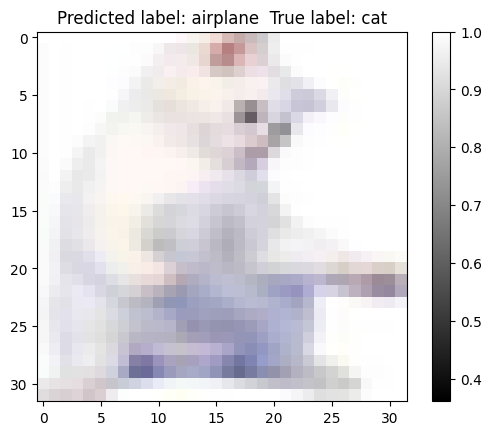

In [16]:
# mostrando um exemplo mal-classificado:
misclassified_idx = np.where(p_test != y_test)[0] # retorna um array com os índices de todas as amostras mal-classificadas
i = np.random.choice(misclassified_idx) # escolhe um índice aleatoriamente
plt.imshow(X_test[i], cmap='gray') # plota a imagem em escala de cinza
plt.colorbar()
plt.title(f'Predicted label: {labels[p_test[i]]}  True label: {labels[y_test[i]]}')